# Evaluation Metrics for Classification Model

- Evaluation Metrics from Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# y = y aktual & yp = y prediction
y = [0,0,0,0,1,0,1,1,1,1]
yp = [0,0,0,0,0,1,1,1,1,1]

In [3]:
# sklearn confusion matrix
from sklearn.metrics import confusion_matrix

In [4]:
cm = confusion_matrix(y, yp, labels=[1, 0])
# cm = confusion_matrix(y, yp)
cm

array([[4, 1],
       [1, 4]])

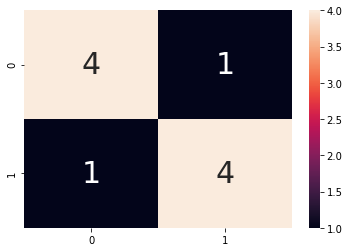

In [9]:
sb.heatmap(pd.DataFrame(cm), annot=True, annot_kws={'size':30})

In [10]:
tp, fn, fp, tn = cm.reshape(-1,)
tp, fn, fp, tn 

(4, 1, 1, 4)

<hr>

### Evaluation Metrics from Confusion Matrix

1. __Accuracy__: Seberapa sering model memprediksi dengan benar?

    Accuracy ini kurang baik diterapkan pada __imbalanced datasets__.
    
    ```
    Accuracy = (TP + TN) / total data
             = (4 + 4) / 10
             = 80%
    ```

2. __Error Rate / Misclassification Rate__: Seberapa sering model memprediksi dengan salah?
    
    ```
    Error Rate = 1 - Accuracy
    
    or 
    
    Error Rate = (FP + FN) / total data
               = (1 + 1) / 10
               = 20%
    ```

> __*Accuracy + Error Rate = 100%*__

<hr>

3. __TP Rate__: Jika aktualnya = 1/yes/positif, maka seberapa sering model memprediksi 1/yes/positif? 
   
   __TP Rate__ disebut juga __Sensitivity__ atau __Recall (positif)__
   
    ```
    TP Rate  = TP / total aktual 1/yes/positif
             = TP / (TP + FN)
             = 4 / (4 + 1)
             = 80%
    ```

4. __FN Rate__: Jika aktualnya = 1/yes/positif, maka seberapa sering model memprediksi 0/no/negatif? 
      
    ```
    FN Rate  = 1 - True Positive Rate
    
    or
    
    FN Rate  = FN / total aktual 1/yes/positif
             = TP / (TP + FN)
             = 1 / (4 + 1)
             = 20%
    ```
    
> __TP Rate + FN Rate = 100%__

<hr>

5. __TN Rate__: Jika aktualnya = 0/no/negatif, maka seberapa sering model memprediksi 0/no/negatif? 
   
   __TN Rate__ disebut juga __Specificity__, __Selectivity__ atau __Recall (negatif)__
   
    ```
    TN Rate  = TN / total aktual 0/no/negatif
             = TN / (FP + TN)
             = 4 / (1 + 4)
             = 80%
    ```

6. __FP Rate__: Jika aktualnya = 0/no/negatif, maka seberapa sering model memprediksi 1/yes/positif? 
   
    ```
    FP Rate  = 1 - True Negative Rate
    
    or 
    
    FP Rate  = FP / total aktual 0/no/negatif
             = FP / (FP + TN)
             = 1 / (1 + 4)
             = 20%
    ```
    
> __TN Rate + FP Rate = 100%__

<hr>

7. __Precision (positive)__: Jika prediksi = 1/yes/positif, seberapa sering prediksi tsb benar?

    ```
    Precision(+) = TP / total prediksi 1/yes/positif
                 = TP / (TP + FP)
                 = 4 / (4 + 1)
                 = 80%
    ```


8. __Precision (negative)__: Jika prediksi = 0/no/negatif, seberapa sering prediksi tsb benar?

    ```
    Precision(-) = TN / total prediski 0/no/negatif
                 = TN / (TN + FN)
                 = 4 / (4 + 1)
                 = 80%
    ```

<hr>

#### Hanya untuk menggali insight dari data aktual

9. __Prevalence__: Berapa kali nilai 1/yes/positif itu terjadi di data sample yg akan diprediksi model?
    
    ```
    Prevalence = aktual 1/yes/positif  /  total data
               = (TP + FN) / total data
               = (4 + 1) / 10
               = 50%
    ```
    
    Prevalence ~ 50%, maka artinya data sample == __balanced dataset__

10. __Null Error Rate__: Berapa kali nilai 0/no/negatif itu terjadi di data sample yg akan diprediksi model?

    ```
    Null Error Rate = 1 - Prevalence
    
    or 
    
    Null Error Rate = aktual 0/no/negatif  /  total data
                    = (TN + FP) / total data
                    = (4 + 1) / 10
                    = 50%
    ```
    
> __Prevalence + Null Error Rate = 100%__

<hr>

11. __Balanced Accuracy (bACC)__

- Untuk dataset __imbalanced__, nilai accuracy bukan metric yang baik untuk mengevaluasi model.
- Misal: dataset yg akan diprediksi = 95% label A, 5% label B. Model saya ngaco => memprediksi semuanya adalah A, maka akurasi model saya = 95%. Tapi bgmn jika di hadapkan pada kasus lain?
- Maka untuk dataset __imbalanced__, akurasinya gunakan __*Balanced Accuracy (bACC)*__

```
bACC = (Recall(+) TP Rate + Recall(-) TN Rate) / 2
     = ( (TP / (TP + FN)) + (TN / (TN + FP) ) / 2
     = ( (4 / (4+1)) + (4 / (4+1)) ) / 2
     = ( 8/5 ) / 2
     = 80%
```

<hr>

12. __F1 Score__: harmonic mean precision(+) & recall(+)
 
    $\displaystyle \textrm{F1 score} = 2 \cdot \frac {\textrm{precision} \cdot \textrm{recall}} {\textrm{precision} + \textrm{recall}} = 2 \cdot \frac {\frac {\textrm{TP}} {\textrm{TP} + \textrm{FP}} \cdot \frac {\textrm{TP}} {\textrm{TP} + \textrm{FN}}} {\frac {\textrm{TP}} {\textrm{TP} + \textrm{FP}} + \frac {\textrm{TP}} {\textrm{TP} + \textrm{FN}}} = 2 \cdot \frac {0.8 \cdot 0.8} {0.8 + 0.8} = 0.8$

In [12]:
tp, fn, fp, tn 

(4, 1, 1, 4)

In [24]:
print('Akurasi =', (tp + tn) / len(y))
print('Error rate =', (fp + fn) / len(y))

print('TP Rate (recall+) =', tp / (tp + fn))
print('FN Rate =', fn / (tp + fn))

print('TN Rate (recall-) =', tn / (tn + fp))
print('FP Rate =', fp / (tn + fp))

print('Precision+ =', tp / (tp + fp))
print('Precision- =', tn / (tn + fn))

print('Prevalence =', (tp + fn) / len(y))
print('Null Error =', (tn + fp) / len(y))

print('bACC =', ((tp / (tp + fn)) + (tn / (tn + fp)) ) / 2 )
print('F1 score =', 2 * ((tp / (tp + fp)) * (tp / (tp + fn))) / ((tp / (tp + fp)) + (tp / (tp + fn))) )

Akurasi = 0.8
Error rate = 0.2
TP Rate (recall+) = 0.8
FN Rate = 0.2
TN Rate (recall-) = 0.8
FP Rate = 0.2
Precision+ = 0.8
Precision- = 0.8
Prevalence = 0.5
Null Error = 0.5
bACC = 0.8
F1 score = 0.8000000000000002


<hr>

### Sklearn Evaluation Metrics for Classification Model

1. __Accuracy Score__ & __Error / Misclassification Rate__

In [26]:
from sklearn.metrics import accuracy_score

In [28]:
print('Akurasi = ', accuracy_score(y, yp))
print('Error rate = ', 1 - accuracy_score(y, yp))

Akurasi =  0.8
Error rate =  0.19999999999999996


2. __Recall(+) / TP Rate & Recall(-) / TN Rate__

In [29]:
from sklearn.metrics import recall_score

In [34]:
print('Recall(+) =', recall_score(y, yp, pos_label=1))
print('Recall(-) =', recall_score(y, yp, pos_label=0))

Recall(+) = 0.8
Recall(-) = 0.8


3. __Precision(+) & Precision(-)__

In [32]:
from sklearn.metrics import precision_score

In [33]:
print('Precision(+) =', precision_score(y, yp, pos_label=1))
print('Precision(-) =', precision_score(y, yp, pos_label=0))

Precision(+) = 0.8
Precision(-) = 0.8


4. __F1 Score__


In [35]:
from sklearn.metrics import f1_score

In [37]:
print('f1 score(+) =', f1_score(y, yp, pos_label=1))
print('f1 score(-) =', f1_score(y, yp, pos_label=0))

f1 score(+) = 0.8000000000000002
f1 score(-) = 0.8000000000000002


5. __Balanced Accuracy (bACC)__

In [38]:
from sklearn.metrics import balanced_accuracy_score

In [40]:
print('bACC =', balanced_accuracy_score(y, yp))

bACC = 0.8


<hr>

### Sklearn Classification Report

1. __*precision_recall_fscore_support()*__

In [41]:
from sklearn.metrics import precision_recall_fscore_support
# SUPPORT = jumlah kejadian tiap class di y aktual

In [44]:
precision_recall_fscore_support(y, yp)

(array([0.8, 0.8]),
 array([0.8, 0.8]),
 array([0.8, 0.8]),
 array([5, 5], dtype=int32))

In [50]:
pre, rec, f1, sup = precision_recall_fscore_support(y, yp)
print('Precision[0, 1] =', pre)
print('Recall[0, 1] =', rec)
print('F1 Score[0, 1] =', f1)
print('Support[0, 1] =', sup)

Precision[0, 1] = [0.8 0.8]
Recall[0, 1] = [0.8 0.8]
F1 Score[0, 1] = [0.8 0.8]
Support[0, 1] = [5 5]


2. __*classification_report()*__

In [51]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y, yp))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

